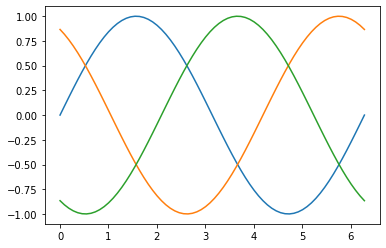

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

t = np.linspace(0,2*np.pi,70)

u = np.sin(t)
v = np.sin(t + np.deg2rad(120))
w = np.sin(t + np.deg2rad(120*2))


plt.plot(t,u)
plt.plot(t,v)
plt.plot(t,w)

In [2]:
from scipy import optimize


def cost(z,ang):

    rad120 = np.deg2rad(120)

    Ue = np.array([1,0])
    Ve = np.array([np.cos(rad120),np.sin(rad120)])
    We = np.array([np.cos(2*rad120),np.sin(2*rad120)])
    
    U = Ue*z[0] + Ve*z[1] + We*z[2]

    target_e = np.array([np.cos(ang),np.sin(ang)])

    return -np.dot(target_e,U)


nl_const = optimize.NonlinearConstraint(lambda z:z[0] + z[1] + z[2],-1.2,1.2)

def opt_UVW(ang):

    J = lambda z:cost(z,ang)

    sol = optimize.minimize(J,[0,0,0],bounds=[(-1,1),(-1,1),(-1,1)],constraints=[nl_const])
    return sol.x

opt_UVW(np.deg2rad(90))

array([ 6.123234e-17,  1.000000e+00, -1.000000e+00])

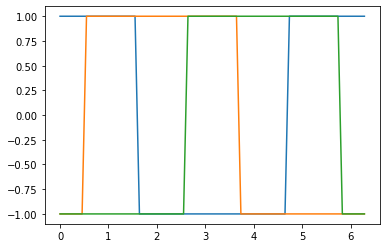

In [3]:

Us = []

for ti in t:
    Ui = opt_UVW(ti)

    Us.append(Ui)

Us = np.array(Us)

plt.plot(t,Us[:,0])
plt.plot(t,Us[:,1])
plt.plot(t,Us[:,2])



(-2.2, 2.2, -1.9052558883257649, 1.9052558883257649)

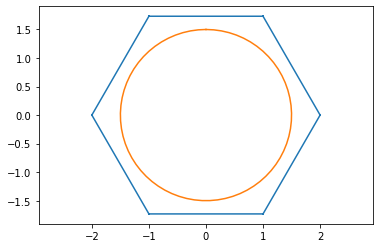

In [4]:
def plot_ab(u,v,w):
    rad120 = np.deg2rad(120)

    Ue = np.array([1,0]).reshape(2,1)
    Ve = np.array([np.cos(rad120),np.sin(rad120)]).reshape(2,1)
    We = np.array([np.cos(2*rad120),np.sin(2*rad120)]).reshape(2,1)

    U = Ue*u + Ve*v + We*w

    plt.plot(U[0,:],U[1,:])

plot_ab(Us[:,0],Us[:,1],Us[:,2])
plot_ab(u,v,w)
plt.axis('equal')

In [5]:
B = -np.cos(np.deg2rad(120))*2 + 1
print(B)
max_R = np.sin(np.deg2rad(60))*B
max_R

1.9999999999999996


1.7320508075688767

In [6]:
def nl_const2_f(z):
    rad120 = np.deg2rad(120)

    Ue = np.array([1,0])
    Ve = np.array([np.cos(rad120),np.sin(rad120)])
    We = np.array([np.cos(2*rad120),np.sin(2*rad120)])
    
    U = Ue*z[0] + Ve*z[1] + We*z[2]

    return np.linalg.norm(U)



nl_const2 = optimize.NonlinearConstraint(nl_const2_f,-1.2,max_R)

def opt_UVW2(ang):

    J = lambda z:cost(z,ang)

    sol = optimize.minimize(J,[0,0,0],bounds=[(-1,1),(-1,1),(-1,1)],constraints=[nl_const2])
    return sol.x

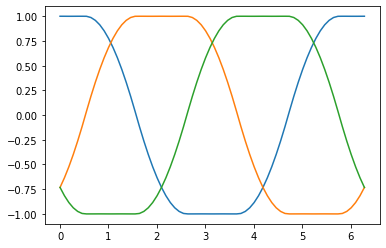

In [7]:
Us2 = []

for ti in t:
    Ui = opt_UVW2(ti)

    Us2.append(Ui)

Us2 = np.array(Us2)

plt.plot(t,Us2[:,0])
plt.plot(t,Us2[:,1])
plt.plot(t,Us2[:,2])


(-2.2, 2.2, -1.9052558883257649, 1.9052558883257649)

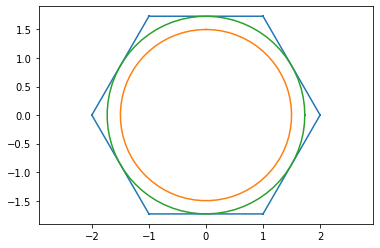

In [8]:
plot_ab(Us[:,0],Us[:,1],Us[:,2])
plot_ab(u,v,w)
plot_ab(Us2[:,0],Us2[:,1],Us2[:,2])
plt.axis('equal')

1.0070062834702778

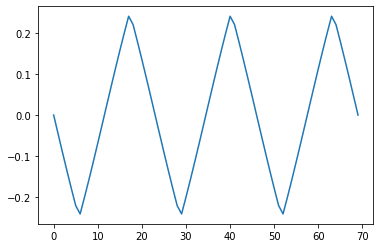

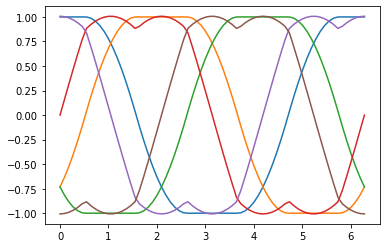

In [9]:
Us3 = []
Vof = []

for i,ti in enumerate(t):
    Ui = [u[i],v[i],w[i]]

    voffs = 1/2*(np.max(Ui) + np.min(Ui))
    Vof.append(voffs)

    Us3.append((Ui - voffs)*1/0.86)

Us3 = np.array(Us3)

plt.plot(Vof)

plt.figure()

plt.plot(t,Us2[:,0])
plt.plot(t,Us2[:,1])
plt.plot(t,Us2[:,2])

plt.plot(t,Us3[:,0])
plt.plot(t,Us3[:,1])
plt.plot(t,Us3[:,2])


np.max(Us3)

* There are bo unique solution that yields a "circular" voltage loop. 
* The classic way is easier to implement but the smooth version might be better from a noise perspective?
* What would be analytical form of the voltage curves? Maybe approx with atan or sigmoid?



(-2.2, 2.2, -1.9167067278995298, 1.9185142738645402)

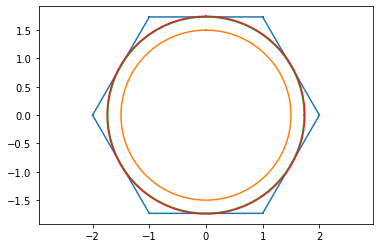

In [10]:
plot_ab(Us[:,0],Us[:,1],Us[:,2])
plot_ab(u,v,w)
plot_ab(Us2[:,0],Us2[:,1],Us2[:,2])
plot_ab(Us3[:,0],Us3[:,1],Us3[:,2])
plt.axis('equal')